## 1. 신고 결과 받기

# problem1
'''
이용자의 ID가 담긴 문자열 배열 id_list, 각 이용자가 신고한 이용자의 ID 정보가 담긴 문자열 배열 report, 
정지 기준이 되는 신고 횟수 k가 매개변수로 주어질 때, 각 유저별로 처리 결과 메일을 받은 횟수를 배열에 담아 return 하도록 solution 함수를 완성해주세요.
'''

#idea
'''
1) 각 유저별로 신고당한 횟수를 저장해야됨
2) 신고당한 횟수 >= k 가 되면 정지되는 조건
3) 유저가 신고해서 정지를 당하면 신고한 유저에게 메일을 가게 만들어야함
+ 한사람이 여러번 신고한것을 한 번 신고한걸로 처리하는 코드도 필요함.
---
report 형태를 보면 공백으로 한칸이 띄워져 있는데 공백을 기준으로 나눠서 신고한 유저/ 신고당한 유저를 구분
구분한 뒤 신고한 유저의 id를 key, 신고당한 유저의 id를 value로 하는 dic로 하는건 어떨까
'''

In [ ]:
## 1트 (실패)

id_list =  ["muzi", "frodo", "apeach", "neo"]
report = ["muzi frodo", "apeach frodo", "frodo neo", "muzi neo", "apeach muzi"]
k = 2

accuser = [] # 신고를 한 사람
accused = [] # 신고 당한 사람
black_list = [] # 신고를 k회 이상 받은 사람
d = {}
for i in range(len(report)):
    p = report[i].split()
    accuser.append(p[0])
    accused.append(p[1])
    d[p[0]] = p[1]
print(d)
# print(f"신고를 한 사람: {accuser}")
# print(f"신고 당한 사람 : {accused}")
# for id in id_list:
#     print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
#     if accused.count(id) >= k:
#         black_list.append(id)
# print(black_list)

#### 문제 : 정지된 사람을 저장하는것까진 완성했지만, 정지된 사람을 신고한 사람을 어떻게 가져와야되는가?
dictionary는 key 중복이 안되기 때문에 한사람이 두명 이상을 신고했을때는 위 방법대로라면 두 개 이상의 이름이 저장이 되지 않음.  
위 방법은 신고를 한 사람을 key로 하고 신고를 당한 사람을 value로 했음.  
~~밑에 주석 처리 된 코드를 보면 신고를 k번 이상 받아 정지된 사람을 저장하는 black_list 리스트가 있는데  
이 리스트를 이용해서 반대로 정지된 사람을 key로 하고 정지된 사람을 신고한 사람을 value로 하는 dic로 하는건 어떨까?~~  
=> return 하는 배열은 id_list에 담긴 id 순서대로 각 유저가 받은 결과 메일 수를 담으면 됩니다.  

In [1]:
## 2트 (실패)

def solution(id_list, report, k):
    cnt = {} # 메일 count 
    for id in id_list:
        cnt[id] = 0
    # print(cnt)

    accuser = [] # 신고를 한 사람
    accused = [] # 신고 당한 사람
    black_list = [] # 신고를 k회 이상 받은 사람

    for i in range(len(report)):
        p = report[i].split()
        accuser.append(p[0])
        accused.append(p[1])

    # print(f"신고를 한 사람: {accuser}")
    # print(f"신고 당한 사람 : {accused}")
    for id in id_list:
        # print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
        if accused.count(id) >= k:
            black_list.append(id)
    print(black_list)
    for j in range(len(black_list)):
        for i in range(len(report)):
            if black_list[j] in accused[i]:
                print(accuser[i], black_list[j])
                cnt[accuser[i]] += 1
    print(cnt)
    result = []
    for id in id_list:
        result.append(cnt[id])
    return result

한 유저를 여러 번 신고할 수도 있지만, 동일한 유저에 대한 신고 횟수는 1회로 처리되는 경우를 반영을 안했음.  
테스트 1은 통과했지만 테스트 2에서 k = 3이고 con 이 ryan을 4번 신고한 경우는 1회 신고한것으로 되어야하지만  
그대로 4번 신고한것으로 간주되어 ryan이 정지 id가 되면서 테스트 2에서 통과하지 못했음.
```python
for id in id_list:
    print(f"id: {id},   신고당한 횟수: {accused.count(id)}")
    if accused.count(id) >= k:
        black_list.append(id)
```
이 코드를 수정하던가, 신고한 사람이랑 신고 당한 사람을 구분하는 리스트 형식을 바꾸던가 해야될듯 (2hour)

## 2. 시소 짝꿍

In [26]:
## 1트

weights = [100,180,360,100,270]	
cnt = 0
for w_1 in weights:
    for w_2 in weights:
        for d_1 in range(2,5):
            for d_2 in range(2,5):
                if w_1 * d_1 == w_2 * d_2:
                    # print(f"{w_1} * {d_1} == {w_2} * {d_2}")
                    cnt += 1
print(cnt)

27


중복되는 경우의 수가 생겨서 실패

In [ ]:
## 2트

def solution(weights):
    cnt = 0
    for w_1 in weights:
        for w_2 in weights:
            if w_1 == w_2:
                break
            for d_1 in range(2,5):
                for d_2 in range(2,5):
                    if w_1 * d_1 == w_2 * d_2:
                        # print(f"{w_1} * {d_1} == {w_2} * {d_2}")
                        cnt += 1
    for i in range(len(weights)): # 같은 몸무게인 사람이 2명 이상일 때:
        if weights.count(weights[i]) >= 2:
            n = weights.count(weights[i])
            cnt += n*(n-1)//2
            # print(weights[i], i)
            break
    return cnt

print(solution([100,180,360,100,270]))

360 * 2 == 180 * 4
270 * 2 == 180 * 3
270 * 4 == 360 * 3
270 * 2 == 180 * 3
270 * 4 == 360 * 3
100 0
6


테스트 1, 2, 12, 16, 17 통과  
테스트 3, 13, 14, 15 실패  
테스트 4 ~ 11 (시간 초과) 실패  

1) 같은 몸무게인 사람의 처리에 대해 처리
2) completion time 줄이기

## 3. 삼총사

In [ ]:
## 1트
number = [-3, -2, -1, 0, 1, 2, 3]
cnt = 0
for i in number:
    for j in number:
        for k in number:
            if i == j or j == k or k == i:
                break
            else:
                if i + j + k == 0:
                    print(f"{i} + {j} + {k} == 0")
                    cnt +=1
print(k)

-1 + 3 + -2 == 0
0 + 1 + -1 == 0
0 + 2 + -2 == 0
0 + 3 + -3 == 0
1 + 0 + -1 == 0
1 + 2 + -3 == 0
2 + 0 + -2 == 0
2 + 1 + -3 == 0
3 + -1 + -2 == 0
3 + 0 + -3 == 0


중복 발생

In [34]:
## 2트

number = [-3, -2, -1, 0, 1, 2, 3]
st = set({})
cnt = 0
for i in number:
    for j in number:
        for k in number:
            if i == j or j == k or k == i:
                break
            else:
                if i + j + k == 0:
                    st.update([[i,j,k]])
                    
print(st)


TypeError: unhashable type: 'list'

set 자료형은 중복이 안되기 때문에 i + j + k == 0 을 만족하는 i,j,k가 특정되었을때 list 안에 i,j,k를 저장하고 set안에 다시 저장하는 2차원 구조를 만들어보려고 했으나, list는 해시가능하지 않기 때문에 set안에 list가 들어갈 수 없음.  

#### hashable 이란?
https://youtu.be/yAzGEFygvC4?si=IXH3jARDu82EiCGE
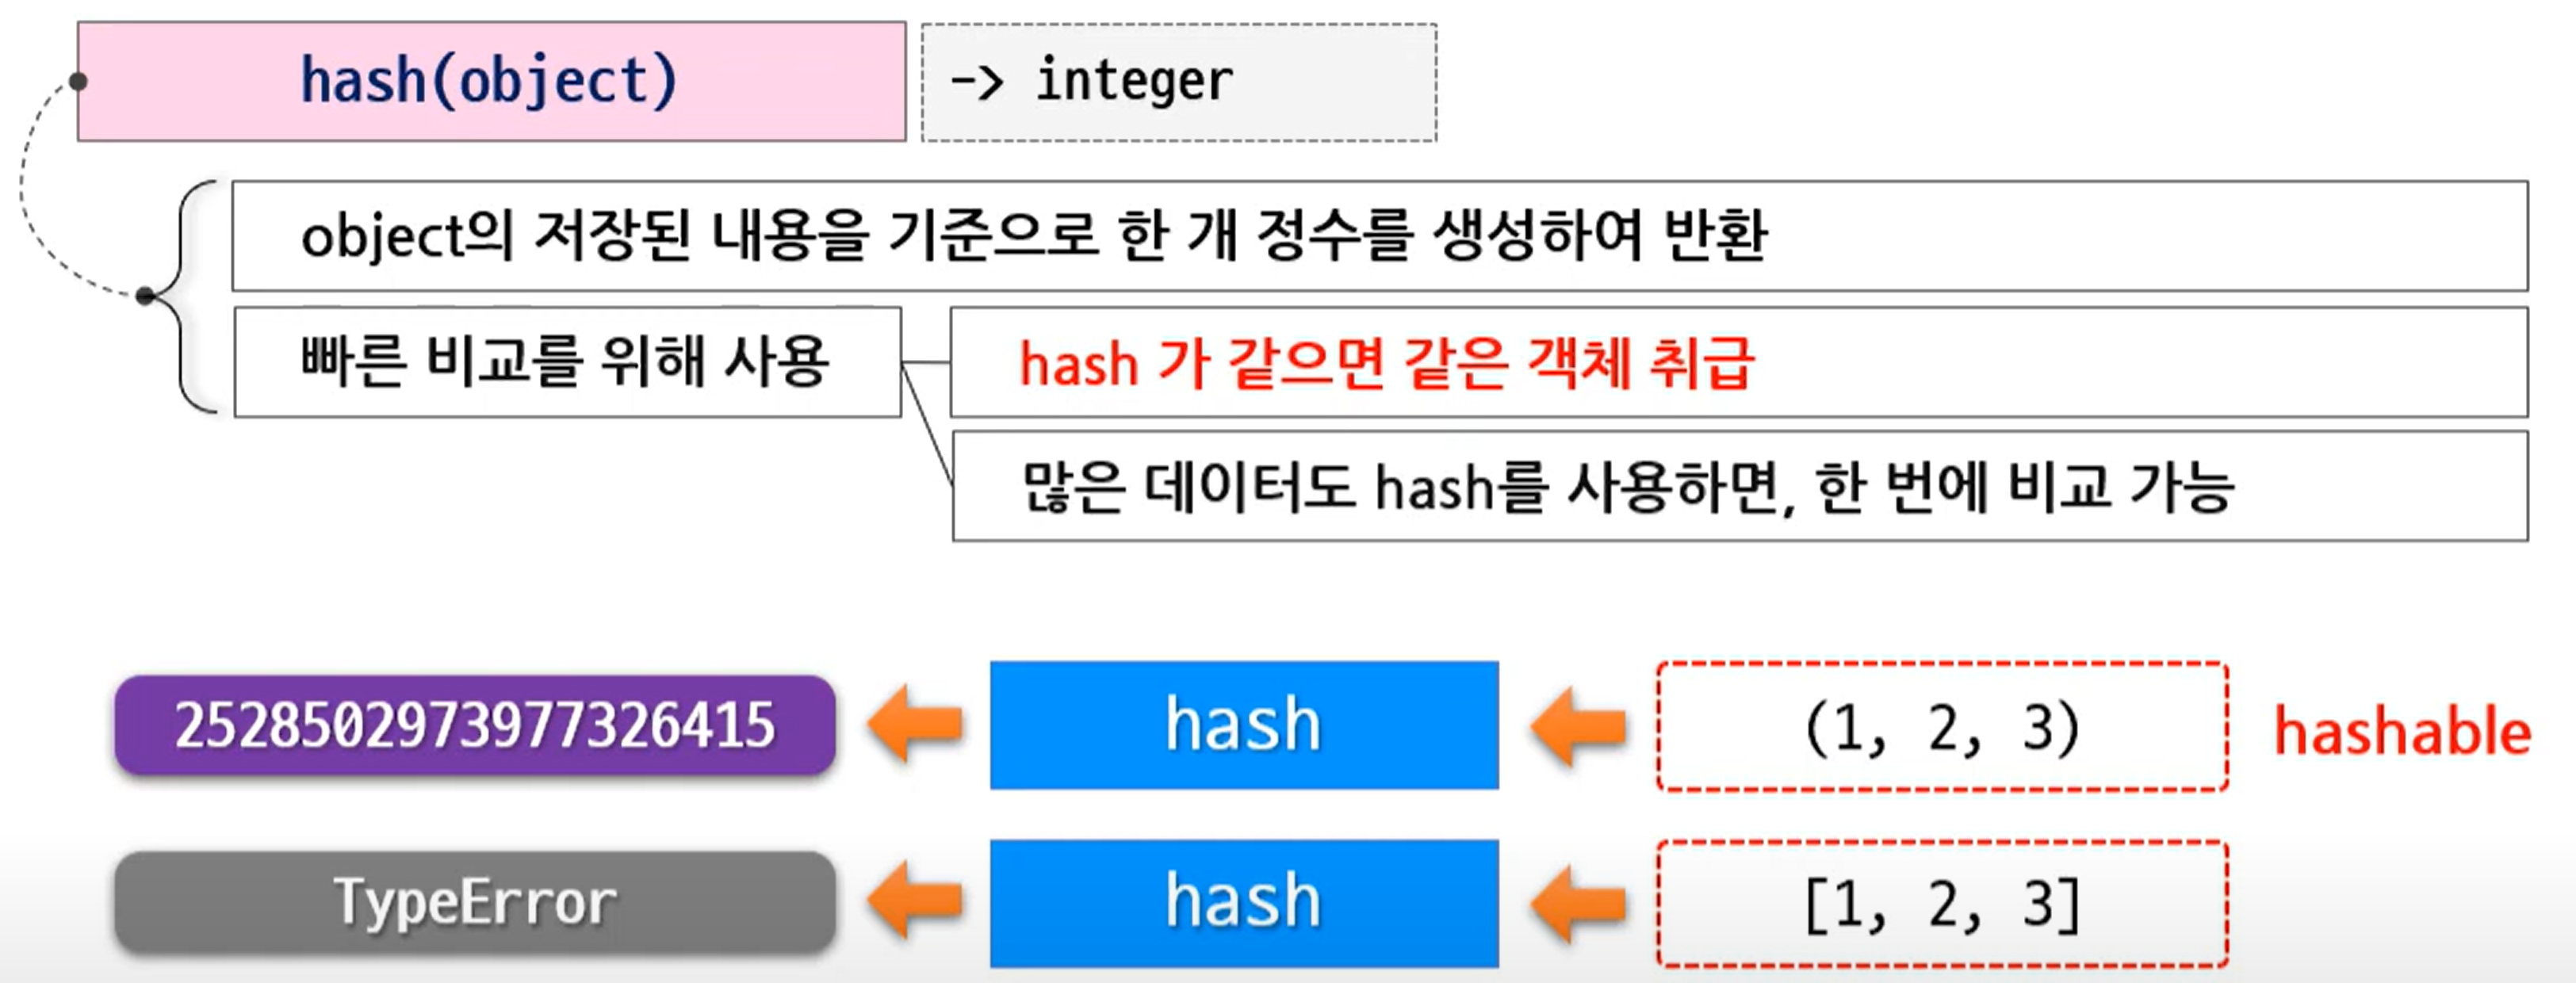

set의 itme, dict의 key는 빠른 중복 판단을 위해 hashable 객체를 사용함.

In [44]:
## 3트

def solution(number):
    cnt = 0
    lst = []
    for i in number:
        for j in number:
            for k in number:
                if i == j or j == k or k == i:
                    break
                else:
                    if i + j + k == 0:
                        lst.append([i, j, k])
                        lst = list(set([tuple(set(item)) for item in lst]))
                        # print(lst)
    return len(lst)

lst 안에 i,j,k 값을 저장하고 중복을 제거하려 했는데 실패

In [ ]:
## 4트

number = [-3, -2, -1, 0, 1, 2, 3]
cnt = 0
for i in number:
    for j in number:
        for k in number:
            if i == j or j == k or k == i:
                break
            else:
                if i + j + k == 0:
                    print(f"{i} + {j} + {k} == 0")
                    cnt +=1
print(k)